# AutoMM Detection - Quick Start with Foundation Model on Open Vocabulary Detection (OVD)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/autogluon/autogluon/blob/master/docs/tutorials/multimodal/object_detection/quick_start/quick_start_ovd.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/autogluon/autogluon/blob/master/docs/tutorials/multimodal/object_detection/quick_start/quick_start_ovd.ipynb)


In this section, our goal is to use a foundation model in object detection to detect novel classes defined by an unbounded (open) vocabulary.

## Setting up the imports
To start, let's import MultiModalPredictor:

In [1]:
!pip install autogluon.multimodal
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git


  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-csu60mb2
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-csu60mb2
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit da9f1c0751935e9284890572069f4b2fef4cbfdc
  Preparing metadata (setup.py) ... done


In [2]:
from autogluon.multimodal import MultiModalPredictor

And also import some other packages that will be used in this tutorial:

In [3]:
import os
import time

## Prepare sample image
Let's use an image in Cityscape dataset to demo:

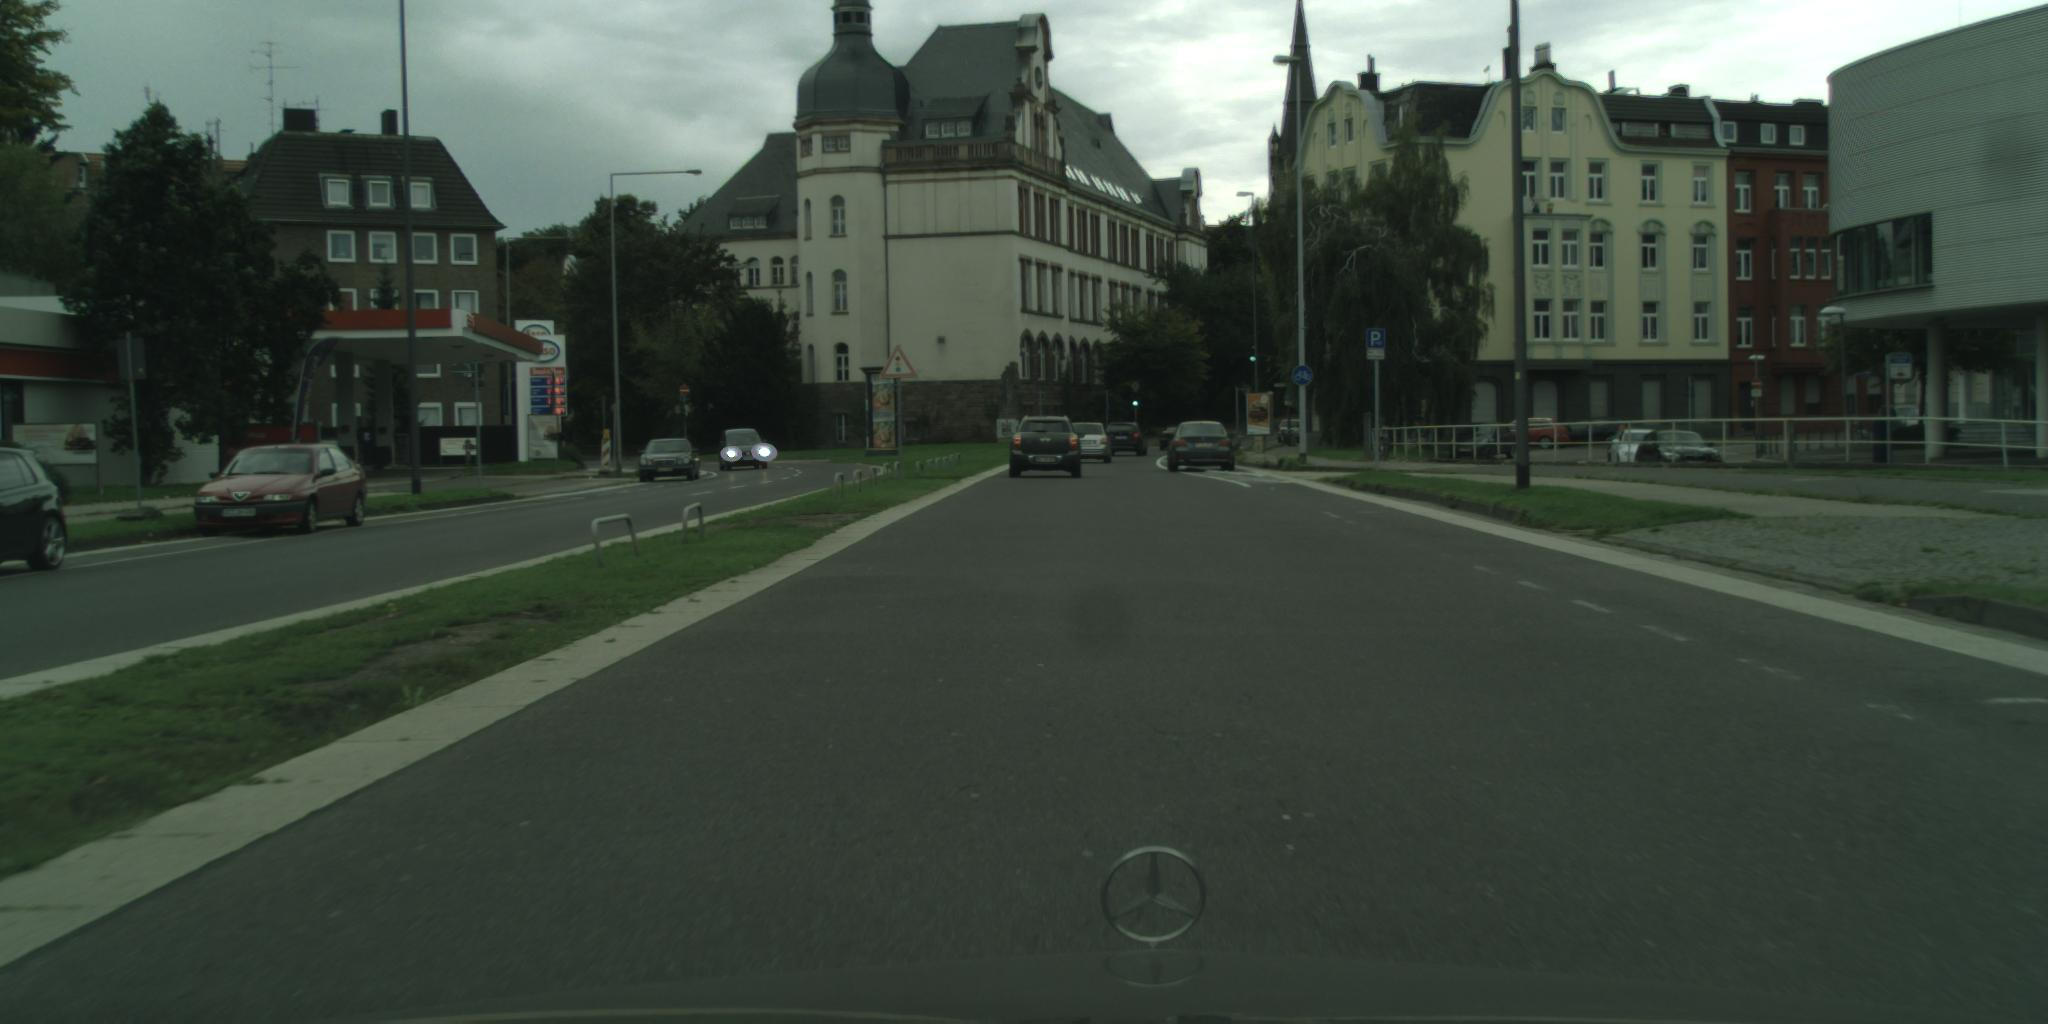

In [4]:
from IPython.display import Image, display
from autogluon.multimodal import download

url = "https://datasets-server.huggingface.co/assets/Chris1/cityscapes/--/Chris1--cityscapes/train/1/image/image.jpg"
cityscape_image = download(url)

pil_img = Image(filename=cityscape_image)
display(pil_img)

## Creating the MultiModalPredictor
We select the `"best_quality"` presets, which uses a SwinB as backbone. This preset gives us higher accuracy for detection. 
We also provide presets `"high_quality"` and `"medium_quality"`, faster but also with lower performance.

In [5]:
presets = "best_quality"

We create the MultiModalPredictor with selected presets.
We need to specify the problem_type to `"open_vocabulary_object_detection"`.

In [6]:
# Init predictor
predictor = MultiModalPredictor(problem_type="open_vocabulary_object_detection")
predictor.set_num_gpus(1)

/home/haoyfang/anaconda3/envs/det116/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


## Inference
To run inference on the image, perform:

In [7]:
pred = predictor.predict(
    {
        "image": [cityscape_image],
        "prompt": ["gas station. tree. car. building. LED. road."],
    },
    as_pandas=True,
)
        
print("pred:")
print(pred)

/home/haoyfang/anaconda3/envs/det116/lib/python3.9/site-packages/transformers/modeling_utils.py:768: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


pred:
       image                                             bboxes
0  image.jpg  [{'bbox': [191.74075010046363, 438.31060333549...


/home/haoyfang/anaconda3/envs/det116/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


The output `pred` is a `pandas` `DataFrame` that has two columns, `image` and `bboxes`.

In `image`, each row contains the image path

In `bboxes`, each row is a list of dictionaries, each one representing a bounding box: `{"class": <predicted_class_name>, "bbox": [x1, y1, x2, y2], "score": <confidence_score>}`

Note that, by default, the `predictor.predict` does not save the detection results into a file.

To run inference and save results, run the following:

In [8]:
!pip install opencv-python

To visualize the detection bounding boxes, run the following:

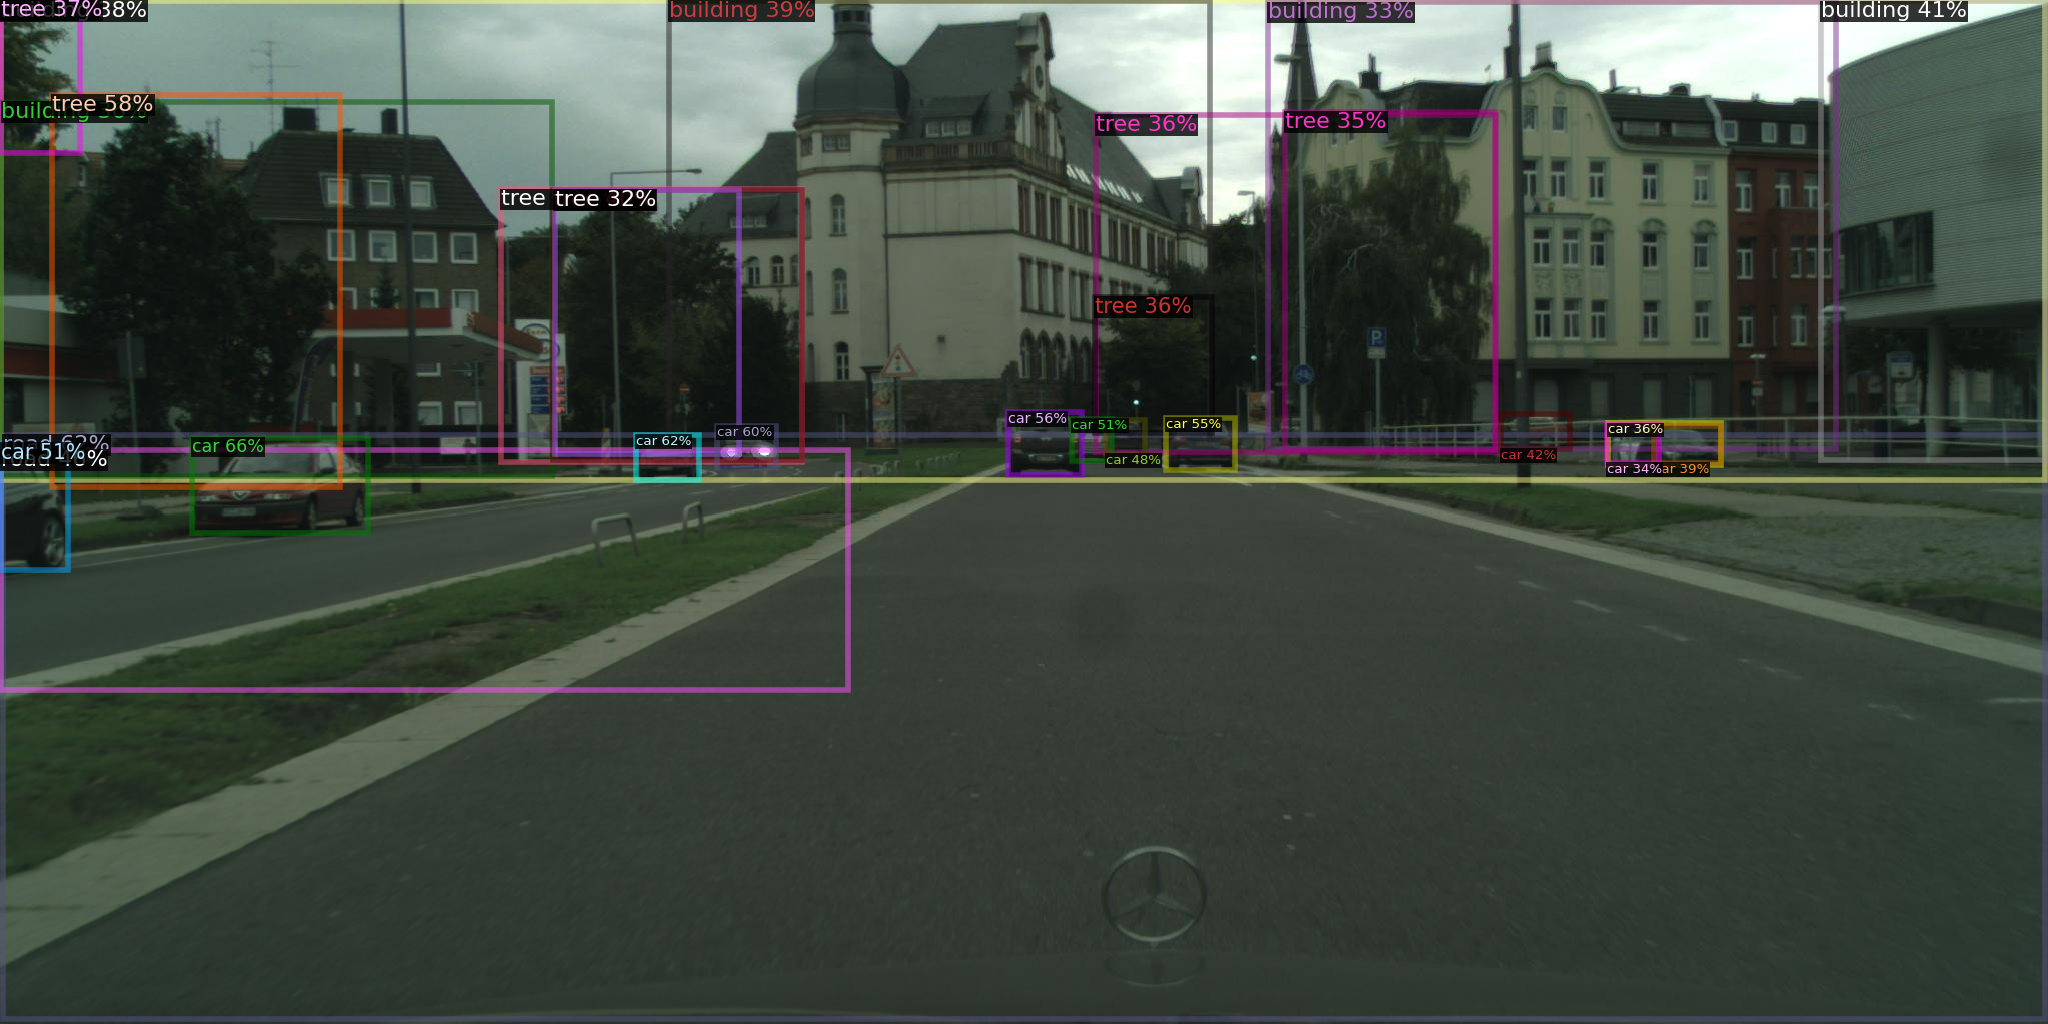

In [9]:
from autogluon.multimodal.utils import Visualizer

conf_threshold = 0.2  # Specify a confidence threshold to filter out unwanted boxes
image_result = pred.iloc[0]

img_path = image_result.image  # Select an image to visualize

visualizer = Visualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

## Other Examples

You may go to [AutoMM Examples](https://github.com/autogluon/autogluon/tree/master/examples/automm) to explore other examples about AutoMM.

## Customization
To learn how to customize AutoMM, please refer to [Customize AutoMM](../../advanced_topics/customization.ipynb).

## Citation

```
@article{DBLP:journals/corr/abs-2107-08430,
  author    = {Zheng Ge and
               Songtao Liu and
               Feng Wang and
               Zeming Li and
               Jian Sun},
  title     = {{YOLOX:} Exceeding {YOLO} Series in 2021},
  journal   = {CoRR},
  volume    = {abs/2107.08430},
  year      = {2021},
  url       = {https://arxiv.org/abs/2107.08430},
  eprinttype = {arXiv},
  eprint    = {2107.08430},
  timestamp = {Tue, 05 Apr 2022 14:09:44 +0200},
  biburl    = {https://dblp.org/rec/journals/corr/abs-2107-08430.bib},
  bibsource = {dblp computer science bibliography, https://dblp.org},
}
```
